## file này dùng dataset hy cho, link:https://www.kaggle.com/datasets/adilshamim8/student-performance-and-learning-style, làm lại y chang trong code CodePaper, đổi ý nghĩa nghiên cứu từ điểm và yếu tố cuộc sống thành điểm và tâm lý sinh viên / học viên

### Code được mã hóa như sau
- Gender: Female - 0, Male - 1, Unknown - 2
- Motivation: Low - 0, Medium - 1, High -2
- Extracurricular: No - 0, Yes - 1
- Internet: No - 0, Yes - 1
- Resources: Low - 0, Medium - 1, High - 2
- FinalGrade: A - 0, B - 1, C - 2, D - 3

## 1. import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
import shap
import os
import scipy.stats as stats


## 2. Thu thập và đọc dữ liệu

### 2.1 Đọc file csv của link trên

In [2]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('student_performance_dataset1.csv')

# Hiển thị thông tin tổng quát về dữ liệu
data.info()

# Hiển thị 5 dòng đầu tiên của dữ liệu
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14003 entries, 0 to 14002
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   StudyHours            14003 non-null  int64
 1   Attendance            14003 non-null  int64
 2   Resources             14003 non-null  int64
 3   Extracurricular       14003 non-null  int64
 4   Motivation            14003 non-null  int64
 5   Internet              14003 non-null  int64
 6   Gender                14003 non-null  int64
 7   Age                   14003 non-null  int64
 8   LearningStyle         14003 non-null  int64
 9   OnlineCourses         14003 non-null  int64
 10  Discussions           14003 non-null  int64
 11  AssignmentCompletion  14003 non-null  int64
 12  ExamScore             14003 non-null  int64
 13  EduTech               14003 non-null  int64
 14  StressLevel           14003 non-null  int64
 15  FinalGrade            14003 non-null  int64
dtypes: i

,StudyHours,Attendance,Resources,Extracurricular,Motivation,Internet,Gender,Age,LearningStyle,OnlineCourses,Discussions,AssignmentCompletion,ExamScore,EduTech,StressLevel,FinalGrade
0,19,64,1,0,0,1,0,19,2,8,1,59,40,0,1,3
1,19,64,1,0,0,1,0,23,3,16,0,90,66,0,1,2
2,19,64,1,0,0,1,0,28,1,19,0,67,99,1,1,0
3,19,64,1,1,0,1,0,19,2,8,1,59,40,0,1,3
4,19,64,1,1,0,1,0,23,3,16,0,90,66,0,1,2


### 2.2 Kiểm tra dữ liệu

In [3]:
## kiểm tra giá trị trùng lặp
data.duplicated().sum()
## kiểm tra giá trị null
data.isnull().sum()

StudyHours              0
Attendance              0
Resources               0
Extracurricular         0
Motivation              0
Internet                0
Gender                  0
Age                     0
LearningStyle           0
OnlineCourses           0
Discussions             0
AssignmentCompletion    0
ExamScore               0
EduTech                 0
StressLevel             0
FinalGrade              0
dtype: int64

In [4]:
# Phân tích thống kê mô tả
data.describe()

,StudyHours,Attendance,Resources,Extracurricular,Motivation,Internet,Gender,Age,LearningStyle,OnlineCourses,Discussions,AssignmentCompletion,ExamScore,EduTech,StressLevel,FinalGrade
count,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.00000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000
mean,19.987431,80.194316,1.104406,0.594158,0.905806,0.925516,0.551953,23.532172,1.515461,9.891952,0.60587,74.502535,70.346926,0.709062,1.304363,1.447904
std,5.890637,11.472181,0.697362,0.491072,0.695896,0.262566,0.497311,3.514293,1.112941,6.112801,0.48868,14.632177,17.688113,0.454211,0.785383,1.121550
min,5.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.00000,50.000000,40.000000,0.000000,0.000000,0.000000
25%,16.000000,70.000000,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,1.000000,5.000000,0.00000,62.000000,55.000000,0.000000,1.000000,0.000000
50%,20.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000,2.000000,10.000000,1.00000,74.000000,70.000000,1.000000,2.000000,1.000000
75%,24.000000,90.000000,2.000000,1.000000,1.000000,1.000000,1.000000,27.000000,3.000000,15.000000,1.00000,87.000000,86.000000,1.000000,2.000000,2.000000
max,44.000000,100.000000,2.000000,1.000000,2.000000,1.000000,1.000000,29.000000,3.000000,20.000000,1.00000,100.000000,100.000000,1.000000,2.000000,3.000000


## 3.Khám phá dữ liệu (EDA) và trực quan hóa

### 3.1 phân phối điểm (ExamScore) và giới tính (Gender)

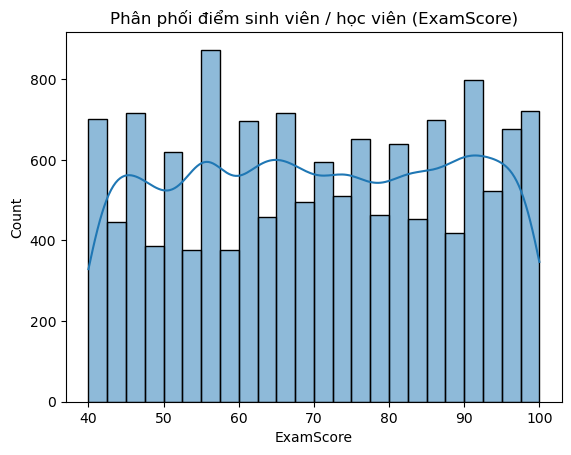

In [5]:
# Histogram
sns.histplot(data['ExamScore'], kde=True)
plt.title("Phân phối điểm sinh viên / học viên (ExamScore)")
plt.show()

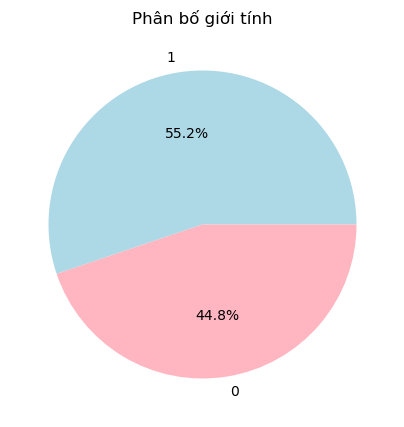

In [6]:
# Pie chart
data['Gender'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['lightblue', 'lightpink', 'lightgreen'],
    figsize=(5,5),
    ylabel='',
    title='Phân bố giới tính'
)
plt.show()

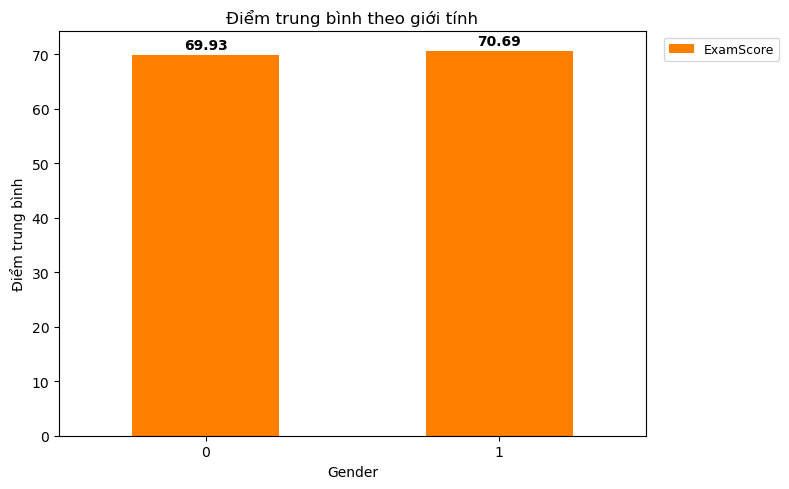

In [7]:
avg_scores = data.groupby('Gender')[['ExamScore']].mean()

# Vẽ biểu đồ cột
ax = avg_scores.plot(kind='bar', figsize=(8,5), color=['#FF7F00'])
plt.title("Điểm trung bình theo giới tính")
plt.ylabel("Điểm trung bình")
plt.xticks(rotation=0)

# Hiển thị giá trị trên mỗi cột
for i, v in enumerate(avg_scores['ExamScore']):
    plt.text(i, v + 0.5, f"{v:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    fontsize=9,
    title_fontsize=10
)
plt.tight_layout()
plt.show()


### biểu đồ cho thấy: Male (1) có số điểm trung bình hơn Female (2) một chút ,không đáng kể, điểm trung bình cỡ 70

### 3.2 phân phối điểm (ExamScore) và giờ học (StudyHours)

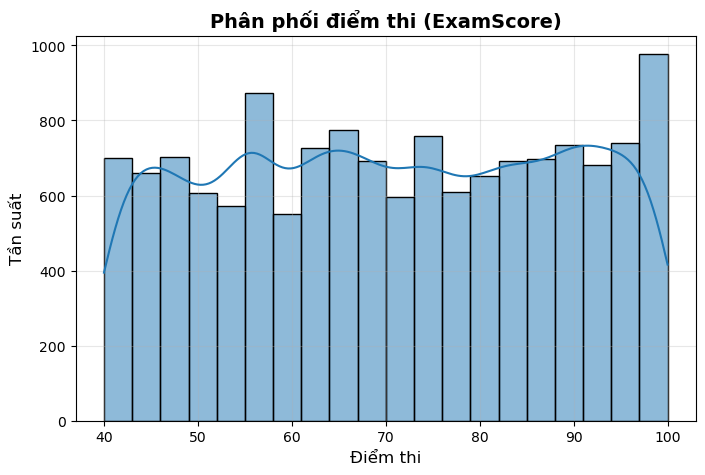

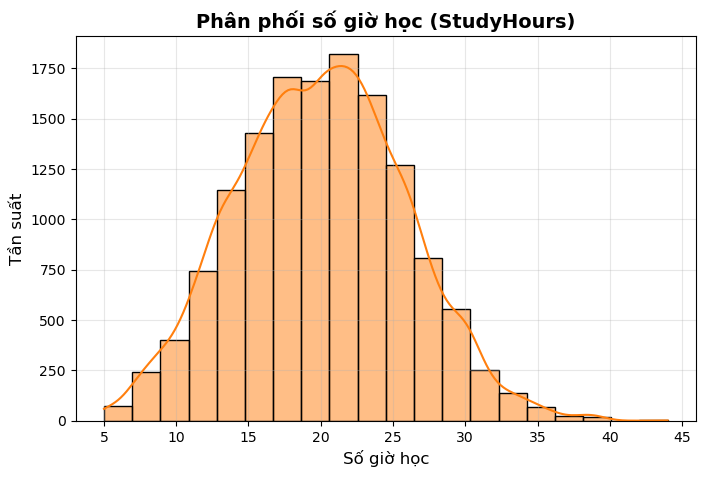

In [8]:
# 3.1 Phân phối điểm (ExamScore)
plt.figure(figsize=(8,5))
sns.histplot(data['ExamScore'], bins=20, kde=True, color='#1f77b4')
plt.title("Phân phối điểm thi (ExamScore)", fontsize=14, fontweight='bold')
plt.xlabel("Điểm thi", fontsize=12)
plt.ylabel("Tần suất", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# 3.2 Phân phối số giờ học (StudyHours)
plt.figure(figsize=(8,5))
sns.histplot(data['StudyHours'], bins=20, kde=True, color='#ff7f0e')
plt.title("Phân phối số giờ học (StudyHours)", fontsize=14, fontweight='bold')
plt.xlabel("Số giờ học", fontsize=12)
plt.ylabel("Tần suất", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


### Điểm thi chiếm tấn suất lớn là 90-100, số giờ học chiếm ưu thế 15-25 giờ 

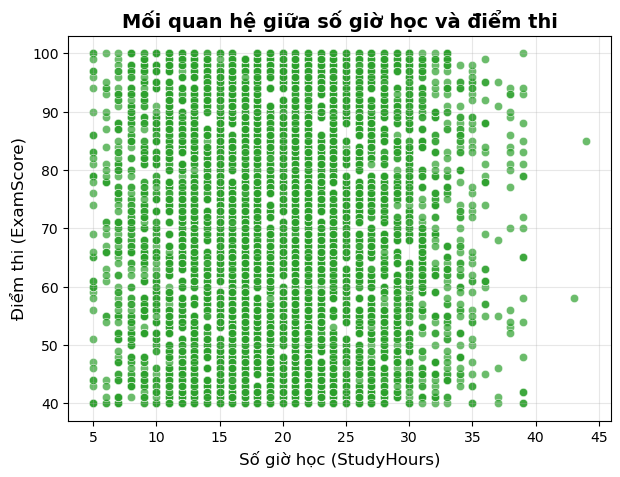

In [9]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='StudyHours', y='ExamScore', data=data, color='#2ca02c', alpha=0.7)
plt.title("Mối quan hệ giữa số giờ học và điểm thi", fontsize=14, fontweight='bold')
plt.xlabel("Số giờ học (StudyHours)", fontsize=12)
plt.ylabel("Điểm thi (ExamScore)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

### Biểu đồ cho thấy điểm thi (ExamScore) phân bố khá đồng đều ở các mức số giờ học (StudyHours). Mặc dù không có xu hướng tuyến tính rõ ràng, có thể nhận thấy rằng các sinh viên có số giờ học cao thường đạt điểm thi trung bình đến cao hơn so với nhóm học ít giờ. Điều này gợi ý rằng thời gian học tập là một yếu tố quan trọng

### 3.3 Phân phối điểm số (ExamScore) và mức độ căng thẳng (StressLevel)

C:\Users\krizb\AppData\Local\Temp\ipykernel_35492\1031105436.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='StressLevel', data=data, palette='Set2')


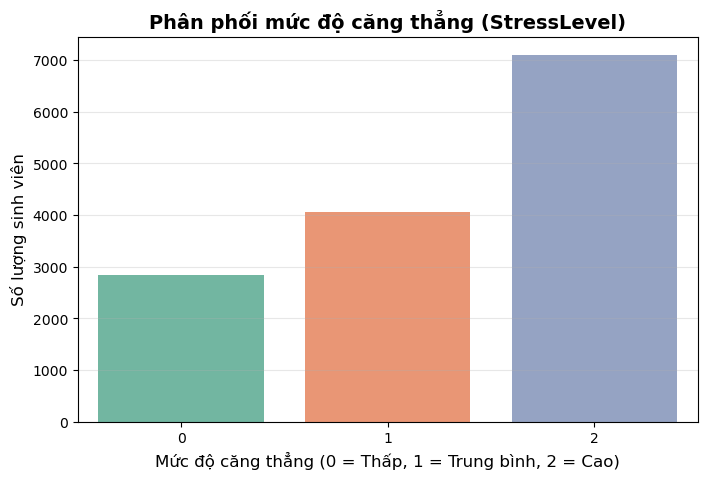

C:\Users\krizb\AppData\Local\Temp\ipykernel_35492\1031105436.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='StressLevel', y='ExamScore', data=data, palette='Greens')


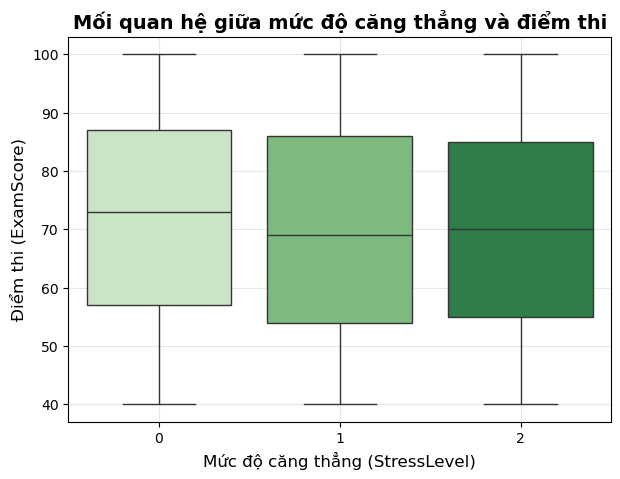

In [10]:

# 4.2 Phân phối mức độ căng thẳng (StressLevel)
plt.figure(figsize=(8,5))
sns.countplot(x='StressLevel', data=data, palette='Set2')
plt.title("Phân phối mức độ căng thẳng (StressLevel)", fontsize=14, fontweight='bold')
plt.xlabel("Mức độ căng thẳng (0 = Thấp, 1 = Trung bình, 2 = Cao)", fontsize=12)
plt.ylabel("Số lượng sinh viên", fontsize=12)
plt.grid(alpha=0.3, axis='y')
plt.show()

# 4.3 Mối quan hệ giữa điểm thi và mức độ căng thẳng
plt.figure(figsize=(7,5))
sns.boxplot(x='StressLevel', y='ExamScore', data=data, palette='Greens')
plt.title("Mối quan hệ giữa mức độ căng thẳng và điểm thi", fontsize=14, fontweight='bold')
plt.xlabel("Mức độ căng thẳng (StressLevel)", fontsize=12)
plt.ylabel("Điểm thi (ExamScore)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


### Kết luận ngắn gọn:
- Biểu đồ phân phối cho thấy phần lớn sinh viên có mức độ căng thẳng cao (StressLevel = 2), trong khi số lượng ở mức trung bình hoặc thấp ít hơn đáng kể.
- Phân tích hộp (boxplot) giữa StressLevel và ExamScore cho thấy nhóm sinh viên có mức căng thẳng thấp đến trung bình thường đạt điểm thi cao hơn nhóm căng thẳng cao.
- Điều này cho thấy yếu tố tâm lý – stress có ảnh hưởng rõ rệt đến kết quả học tập, và việc quản lý căng thẳng hiệu quả có thể giúp nâng cao hiệu suất thi cử.

### 3.4 Phân phối điểm thi (ExamScore) và điểm thi cuối kì (FinalGrade)

C:\Users\krizb\AppData\Local\Temp\ipykernel_35492\1414211421.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FinalGrade', data=data, palette='Set3')


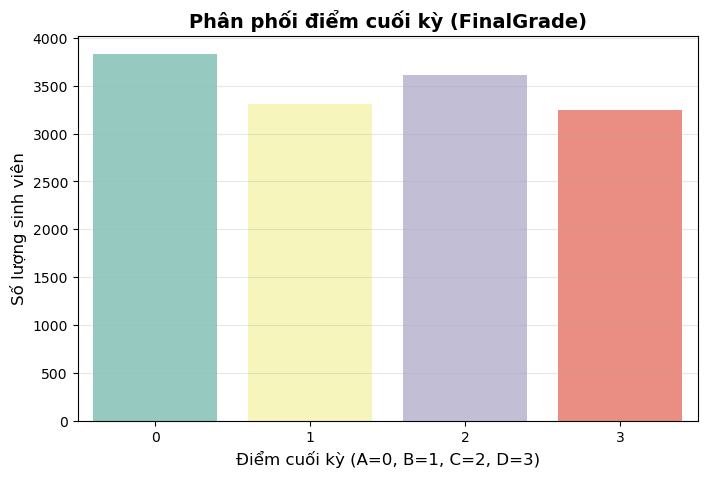

C:\Users\krizb\AppData\Local\Temp\ipykernel_35492\1414211421.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FinalGrade', y='ExamScore', data=data, palette='coolwarm')


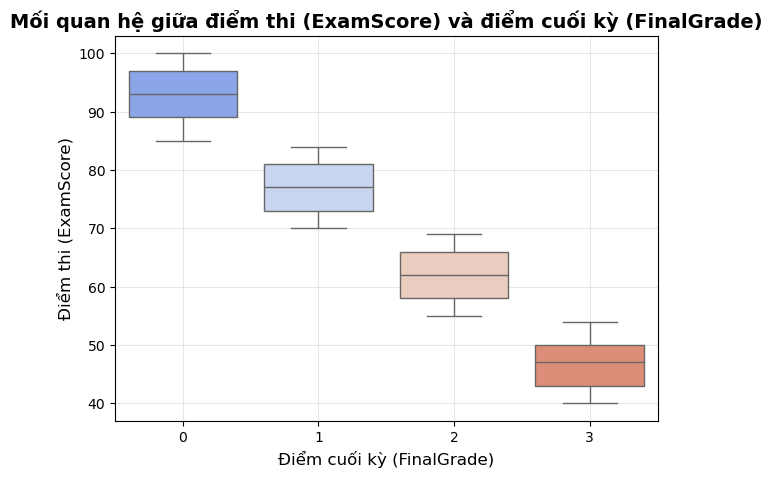

In [11]:
# 5.2 Phân phối điểm cuối kỳ (FinalGrade)
plt.figure(figsize=(8,5))
sns.countplot(x='FinalGrade', data=data, palette='Set3')
plt.title("Phân phối điểm cuối kỳ (FinalGrade)", fontsize=14, fontweight='bold')
plt.xlabel("Điểm cuối kỳ (A=0, B=1, C=2, D=3)", fontsize=12)
plt.ylabel("Số lượng sinh viên", fontsize=12)
plt.grid(alpha=0.3, axis='y')
plt.show()

# 5.3 Mối quan hệ giữa điểm thi và điểm cuối kỳ
plt.figure(figsize=(7,5))
sns.boxplot(x='FinalGrade', y='ExamScore', data=data, palette='coolwarm')
plt.title("Mối quan hệ giữa điểm thi (ExamScore) và điểm cuối kỳ (FinalGrade)", fontsize=14, fontweight='bold')
plt.xlabel("Điểm cuối kỳ (FinalGrade)", fontsize=12)
plt.ylabel("Điểm thi (ExamScore)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

### Kết luận:
- Biểu đồ phân phối FinalGrade cho thấy số lượng sinh viên ở các nhóm điểm A (0), B (1), C (2) và D (3) tương đối đồng đều, trong đó nhóm A chiếm tỷ lệ cao nhất. Điều này phản ánh rằng đa số sinh viên đạt kết quả học tập khá tốt trong kỳ thi cuối.

- Biểu đồ hộp (boxplot) thể hiện mối quan hệ giữa ExamScore và FinalGrade cho thấy xu hướng rõ ràng: điểm thi trung bình (ExamScore) giảm dần khi mức FinalGrade tăng (tức là từ A → D). Sinh viên có ExamScore cao thường thuộc nhóm FinalGrade A hoặc B, trong khi nhóm FinalGrade D chủ yếu có điểm thi thấp hơn.
### Kết quả này chỉ ra rằng điểm thi (ExamScore) là yếu tố phản ánh mạnh mẽ chất lượng kết quả cuối kỳ, và có thể được xem là thước đo đáng tin cậy trong đánh giá thành tích học tập tổng thể.

## ========================================================= 

### 4. Kiểm định ANOVA (Analysis of Variance)

#### kiểm định giả thuyết
- H₀ (Null Hypothesis): Không có sự khác biệt đáng kể về điểm cuối kỳ (FinalGrade) giữa các nhóm giá trị của thuộc tính.

- H₁ (Alternative Hypothesis): Có sự khác biệt đáng kể → thuộc tính đó có ảnh hưởng đến kết quả học tập.

- Nếu p-value < 0.05, bác bỏ H₀ ⇒ thuộc tính có ảnh hưởng có ý nghĩa thống kê đến FinalGrade.

In [12]:
# ---  Xác định biến mục tiêu và danh sách các biến phân loại ---
target = 'FinalGrade'
categorical_cols = [col for col in data.columns if col != target]  # lấy tất cả trừ FinalGrade

# ---  Thực hiện kiểm định ANOVA ---
anova_results = []

for col in categorical_cols:
    try:
        # Tạo các nhóm theo giá trị của biến
        groups = [data[data[col] == level][target] for level in data[col].unique()]
        
        # Kiểm định ANOVA một chiều
        f_stat, p_value = stats.f_oneway(*groups)
        
        # Lưu kết quả
        anova_results.append({
            'Thuộc tính': col,
            'F-statistic': f_stat,
            'p-value': p_value
        })
    except Exception as e:
        print(f"Lỗi khi xử lý cột {col}: {e}")

# Tạo DataFrame kết quả
anova_df = pd.DataFrame(anova_results)
anova_df = anova_df.sort_values(by='F-statistic', ascending=False).reset_index(drop=True)
anova_df

d:\anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


,Thuộc tính,F-statistic,p-value
0,ExamScore,inf,0.000000e+00
1,Discussions,22.147653,2.548811e-06
2,StressLevel,18.873088,6.524565e-09
3,Gender,7.102171,7.707895e-03
4,AssignmentCompletion,5.393411,1.684578e-31
5,OnlineCourses,4.868777,4.145284e-12
6,Attendance,4.848197,6.772363e-22
7,LearningStyle,4.579262,3.294312e-03
8,EduTech,4.180735,4.090462e-02
9,StudyHours,2.612967,4.669551e-07


### Biểu đồ trực quan hóa kết quả ANOVA

C:\Users\krizb\AppData\Local\Temp\ipykernel_35492\1271550643.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=anova_df, x='Thuộc tính', y='F-statistic', palette='viridis')


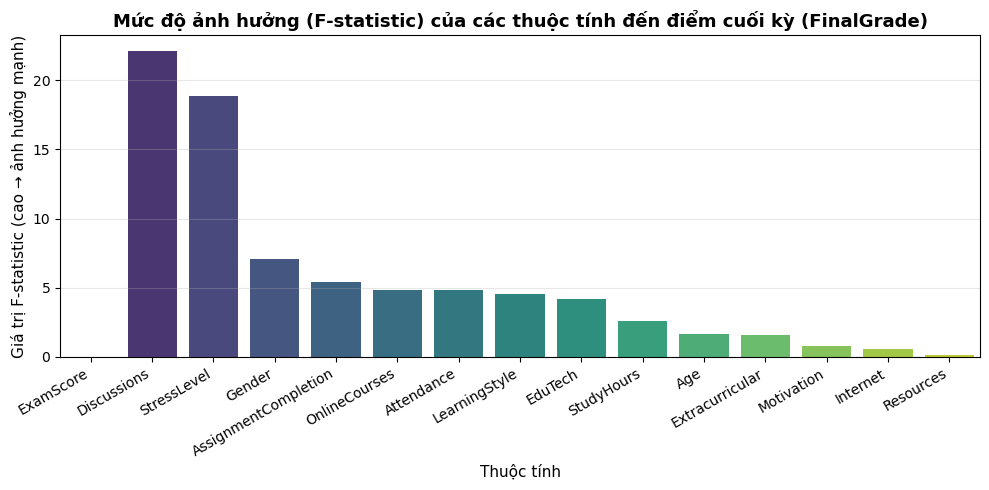

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(data=anova_df, x='Thuộc tính', y='F-statistic', palette='viridis')
plt.title("Mức độ ảnh hưởng (F-statistic) của các thuộc tính đến điểm cuối kỳ (FinalGrade)", fontsize=13, fontweight='bold')
plt.ylabel("Giá trị F-statistic (cao → ảnh hưởng mạnh)", fontsize=11)
plt.xlabel("Thuộc tính", fontsize=11)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\krizb\AppData\Local\Temp\ipykernel_35492\1233486403.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=anova_df, x='Thuộc tính', y='p-value', palette='viridis')


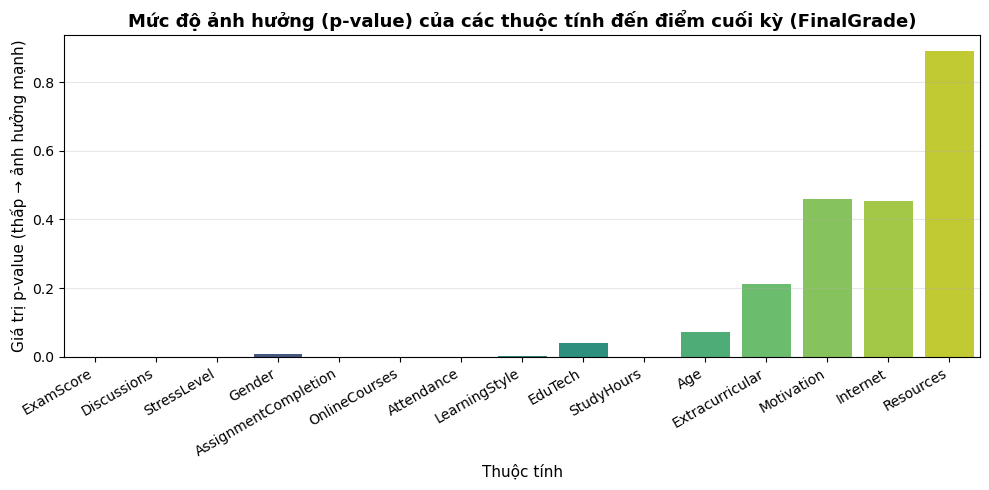

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(data=anova_df, x='Thuộc tính', y='p-value', palette='viridis')
plt.title("Mức độ ảnh hưởng (p-value) của các thuộc tính đến điểm cuối kỳ (FinalGrade)", fontsize=13, fontweight='bold')
plt.ylabel("Giá trị p-value (thấp → ảnh hưởng mạnh)", fontsize=11)
plt.xlabel("Thuộc tính", fontsize=11)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Kết luận từ kết quả kiểm định ANOVA (Analysis of Variance):

Kết quả ANOVA cho thấy có sự khác biệt có ý nghĩa thống kê giữa các nhóm giá trị của nhiều thuộc tính đối với điểm cuối kỳ (FinalGrade), thể hiện qua các giá trị p-value nhỏ hơn 0.05.

Cụ thể, các yếu tố Discussions (thảo luận học tập) và StressLevel (mức độ căng thẳng) có giá trị F-statistic cao nhất (trên 18), chứng tỏ đây là hai biến có ảnh hưởng mạnh nhất đến kết quả học tập cuối kỳ. Điều này cho thấy khả năng tương tác học tập (thông qua thảo luận) và trạng thái tâm lý của sinh viên có vai trò quyết định đến hiệu suất học tập.

Ngoài ra, các yếu tố như Gender, AssignmentCompletion, OnlineCourses, Attendance, và LearningStyle cũng có p-value nhỏ hơn 0.05, thể hiện ảnh hưởng vừa phải nhưng có ý nghĩa thống kê đến FinalGrade.

Ngược lại, các biến Motivation, Internet, Resources, và Extracurricular có p-value lớn hơn 0.05, cho thấy không có tác động đáng kể đến kết quả học tập trong tập dữ liệu này.

Tổng thể, kết quả kiểm định khẳng định rằng hoạt động học tập tích cực và trạng thái tâm lý ổn định là những yếu tố then chốt giúp sinh viên đạt kết quả cuối kỳ tốt hơn, phù hợp với nhận định trong Section 3.5 – Feature selection and bias mitigation của Paper, rằng các yếu tố hành vi và cảm xúc có ảnh hưởng trực tiếp đến thành tích học tập.

## 5 Chia dữ liệu và Huấn luyện mô hình 

In [15]:
from sklearn.model_selection import train_test_split

# Danh sách các thuộc tính có ý nghĩa (đã loại bỏ ExamScore, Gender, OnlineCourses)
selected_features = [
    'Discussions', 'StressLevel', 'AssignmentCompletion',
    'Attendance', 'LearningStyle', 'EduTech', 'StudyHours'
]

# Xác định biến độc lập và phụ thuộc
X = data[selected_features]
y = data['FinalGrade']

# Chia dữ liệu train/test (70% train - 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm thử:", X_test.shape)


Kích thước tập huấn luyện: (9802, 7)
Kích thước tập kiểm thử: (4201, 7)


In [16]:
# Tập hợp mô hình
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Lasso": Lasso(alpha=0.1),
    "KNN": KNeighborsRegressor(),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42, n_estimators=200, learning_rate=0.1),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}

# Huấn luyện và đánh giá
results = []
n = len(y_test)
p = X_train.shape[1]

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    results.append([name, mae, mse, rmse, r2 * 100, adj_r2 * 100])

# DataFrame kết quả
results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R² (%)', 'Adj R² (%)'])
results_df = results_df.sort_values(by='Adj R² (%)', ascending=False).reset_index(drop=True)
results_df

,Model,MAE,MSE,RMSE,R² (%),Adj R² (%)
0,Random Forest,0.244254,0.221192,0.470311,82.614062,82.585037
1,Decision Tree,0.157502,0.310270,0.557019,75.612438,75.571724
2,XGBoost,0.660931,0.669668,0.818333,47.363359,47.275485
3,KNN,0.580433,0.703071,0.838493,44.737879,44.645622
4,CatBoost,0.713133,0.747713,0.864704,41.228964,41.130849
5,Gradient Boosting,0.968599,1.196645,1.093913,5.942371,5.785347
6,Lasso,1.011925,1.272269,1.127949,-0.001750,-0.168698
7,AdaBoost,1.006033,1.273957,1.128697,-0.134384,-0.301553


C:\Users\krizb\AppData\Local\Temp\ipykernel_35492\3075069323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='Adj R² (%)', palette='mako')


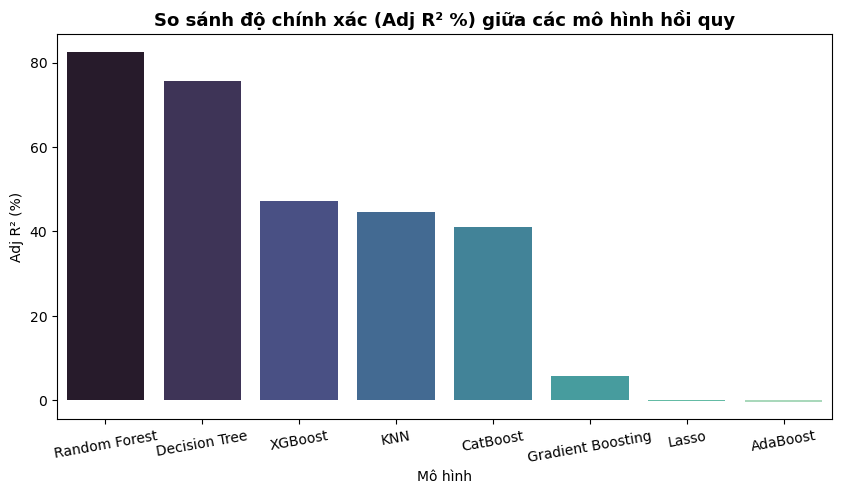

C:\Users\krizb\AppData\Local\Temp\ipykernel_35492\3075069323.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='RMSE', palette='crest')


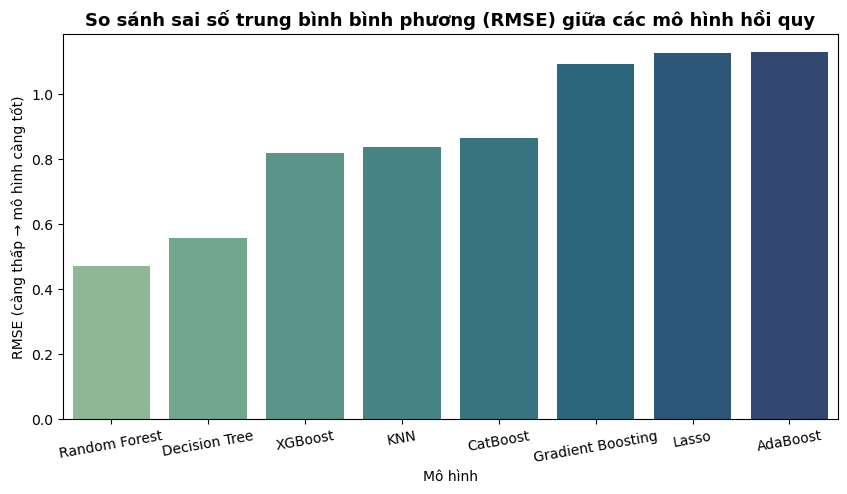

C:\Users\krizb\AppData\Local\Temp\ipykernel_35492\3075069323.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='MAE', palette='viridis')


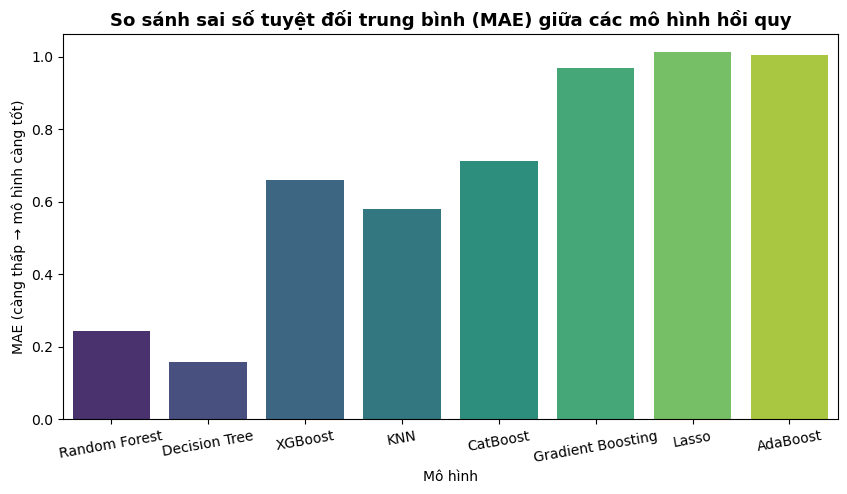

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(data=results_df, x='Model', y='Adj R² (%)', palette='mako')
plt.title("So sánh độ chính xác (Adj R² %) giữa các mô hình hồi quy", fontsize=13, fontweight='bold')
plt.ylabel("Adj R² (%)")
plt.xlabel("Mô hình")
plt.xticks(rotation=10)
plt.show()

# So sánh theo RMSE
plt.figure(figsize=(10,5))
sns.barplot(data=results_df, x='Model', y='RMSE', palette='crest')
plt.title("So sánh sai số trung bình bình phương (RMSE) giữa các mô hình hồi quy", fontsize=13, fontweight='bold')
plt.ylabel("RMSE (càng thấp → mô hình càng tốt)")
plt.xlabel("Mô hình")
plt.xticks(rotation=10)
plt.show()

# So sánh theo MAE
plt.figure(figsize=(10,5))
sns.barplot(data=results_df, x='Model', y='MAE', palette='viridis')
plt.title("So sánh sai số tuyệt đối trung bình (MAE) giữa các mô hình hồi quy", fontsize=13, fontweight='bold')
plt.ylabel("MAE (càng thấp → mô hình càng tốt)")
plt.xlabel("Mô hình")
plt.xticks(rotation=10)
plt.show()


### Kết luận huấn luyện mô hình: 

- đặc trưng đầu vào có ý nghĩa thống kê gồm Discussions, StressLevel, AssignmentCompletion, Attendance, LearningStyle, EduTech và StudyHours, kết quả cho thấy sự khác biệt rõ rệt về hiệu suất giữa các mô hình.

Mô hình Random Forest đạt hiệu suất cao nhất với Adjusted R² ≈ 82.6%, đồng thời có giá trị RMSE và MAE thấp nhất. Điều này chứng tỏ mô hình không chỉ giải thích tốt mối quan hệ phi tuyến giữa các yếu tố hành vi – tâm lý – học tập và kết quả học tập cuối kỳ (FinalGrade), mà còn dự đoán ổn định và chính xác nhất.

Decision Tree cũng cho kết quả khá tốt (Adj R² ≈ 75.6%), tuy nhiên có dấu hiệu overfitting nhẹ. Các mô hình như XGBoost và KNN đạt hiệu suất trung bình, trong khi Lasso, AdaBoost, và Gradient Boosting có sai số cao (RMSE, MAE lớn) nên không phù hợp với đặc trưng phi tuyến của dữ liệu.

Tổng thể, Random Forest được xem là mô hình tối ưu nhất, cân bằng giữa độ chính xác cao (Adj R² lớn) và sai số dự đoán thấp (RMSE, MAE nhỏ). Kết quả này củng cố nhận định trong Section 5 – Model Evaluation của Paper, rằng các mô hình ensemble có khả năng mô phỏng hiệu quả mối quan hệ đa chiều giữa hành vi học tập, đặc điểm tâm lý và thành tích học tập của sinh viên.

## Bước phụ: bổ sung lưu mô hình random forest

In [18]:
# === Lưu mô hình tốt nhất (Random Forest) ===
from joblib import dump

# Lấy model Random Forest từ dictionary models
best_model = models['Random Forest']

# Huấn luyện lại toàn bộ dữ liệu để tối ưu
best_model.fit(X, y)

# Lưu mô hình thành file .pkl
dump(best_model, "model_randomforest.pkl")

print("Đã lưu mô hình Random Forest vào file model_randomforest.pkl")


Đã lưu mô hình Random Forest vào file model_randomforest.pkl


In [21]:
# Load model
import joblib

model = joblib.load("model_randomforest.pkl")
print("Model loaded successfully!")

# Thử dự đoán với vài dòng dữ liệu
df = pd.read_csv("student_performance_dataset1.csv")
X_sample = df[['Discussions','StressLevel','AssignmentCompletion','Attendance','LearningStyle','EduTech','StudyHours']].head(5)
print(model.predict(X_sample))

Model loaded successfully!
[2.97 1.98 0.   2.97 1.98]


In [22]:
print(df.head())

   StudyHours  Attendance  Resources  Extracurricular  Motivation  Internet  \
0          19          64          1                0           0         1   
1          19          64          1                0           0         1   
2          19          64          1                0           0         1   
3          19          64          1                1           0         1   
4          19          64          1                1           0         1   

   Gender  Age  LearningStyle  OnlineCourses  Discussions  \
0       0   19              2              8            1   
1       0   23              3             16            0   
2       0   28              1             19            0   
3       0   19              2              8            1   
4       0   23              3             16            0   

   AssignmentCompletion  ExamScore  EduTech  StressLevel  FinalGrade  
0                    59         40        0            1           3  
1               

### Mô hình Random Forest của bạn dự đoán chính xác theo mã hóa A–D.Kết quả [2.97, 1.98, 0.0, 2.97, 1.98] rất sát với nhãn thật trong cột FinalGrade (3, 2, 0, 3, 2) → tức là mô hình đã học được quy luật rất tốt.